# Tests

## 1. Iterations tests

Let's consider task of minimization for convex quadratic form on fixed square when there is global solution in this square.

<IPython.core.display.Javascript object>


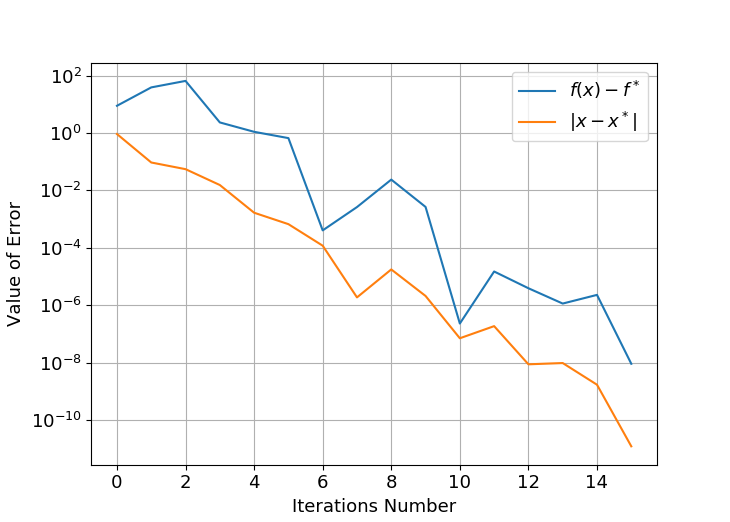

Theoretical Iteration Number through function constant 39.0
Theoretical Iteration Number through gradient constant 19.0


In [2]:
import sys
sys.path.append("./Experiments")
sys.path.append("./Tests_functions")
import comparison
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook
res = comparison.qf_test(1e-8)

Now we consider task of minimization for convex quadratic form on fixed square when there is not global solution in this square.

<IPython.core.display.Javascript object>


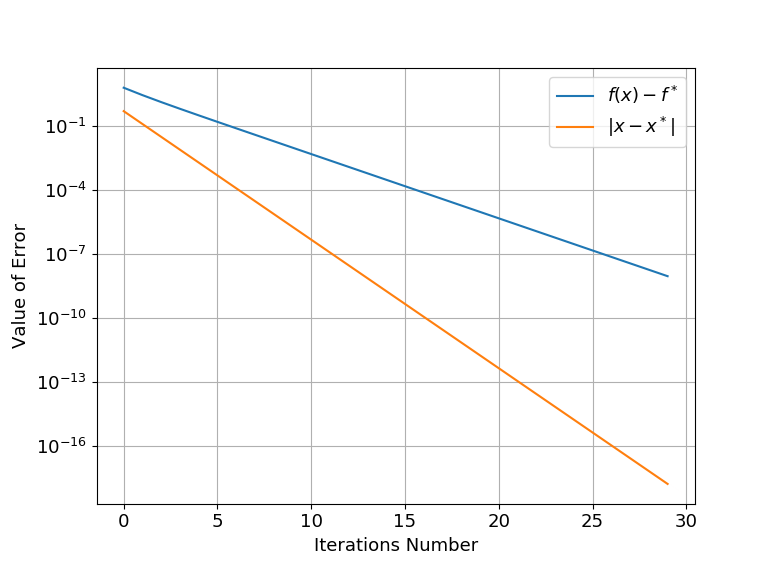

Theoretical Iteration Number through function constant 30.0
Theoretical Iteration Number through gradient constant 14.0


In [2]:
import sys
sys.path.append("./Experiments")
sys.path.append("./Tests_functions")
import comparison
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook
res = comparison.qf_test_2(1e-8)

## 2. Estimates for accuracy of solution on segment

There are three strategies for to stop search of solution on segment. Below $\delta$ is a distance between current point-approximation and accurate solution.

* **The first strategy** - Little big
$$\delta \leq \frac{M_{der}}{L},$$

where $L$ is a Lipschitz constant for *gradient*, $M_{der}$ is a lower bound of derivative with the respect to $y$ for parallel to axis $Ox$ segment and derivative with the respect to $x$ for parallel to axis $Oy$ segment in point solution on segment. For this strategy an estimate is computed on each new segment. This strategy is workable (see theorem 4.1 in [Description of method](https://github.com/ASEDOS999/Optimization-Halving-The-Square/blob/master/One%20method.pdf))

* **The second strategy** - Constant estimate for all segments

$$\delta \leq \frac{\epsilon}{2La\sqrt{5}\log_2\frac{2Ma\sqrt{2}}{\epsilon}},$$

where $L$ and $M$ are Lipschitz constant for *gradient* and *function*, $a$ is a size of square, $\epsilon$ is a required accuracy of initial task's solution. This strategy requires to compute the estimate one time for the one start method. There is proof for this istimate in theorem 1 in [Article of Pasechnyuk and Stonyakin](https://arxiv.org/pdf/1812.10300.pdf).

* **The third strategy** - Comparison with gradient in current point

$$\delta \leq \frac{|f'(\textbf{x}_{cur})|}{L},$$

where $\textbf{x}_{cur}$ is current point-approximation, $L$ is a Lipschitz constant for *gradient*. The $f'(\textbf{x}_{cur})$ is a derivative with the respect to $x$ for parallel to axis $Oy$ segment and is a derivative with the respect to $y$ for parallel to axis $Ox$.

**Important remark**: in the halving square method we use golden search selection as method that solve one-dimensional task.

In [11]:
import sys
sys.path.append("./Experiments")
sys.path.append("./Tests_functions")
import matplotlib.pyplot as plt
import estimates
%matplotlib notebook

epsilon = [0.1**(i) for i in range(7)]
d = estimates.get_tests_estimates(epsilon)

eps =  1.0e+00
Mean time (True gradient) = 0.71ms
Mean time (Constant estimate) = 1.42ms
Mean time (Current gradient) = 0.74ms
eps =  1.0e-01
Mean time (True gradient) = 1.10ms
Mean time (Constant estimate) = 2.57ms
Mean time (Current gradient) = 1.16ms
eps =  1.0e-02
Mean time (True gradient) = 1.71ms
Mean time (Constant estimate) = 4.53ms
Mean time (Current gradient) = 1.84ms
eps =  1.0e-03
Mean time (True gradient) = 2.43ms
Mean time (Constant estimate) = 7.18ms
Mean time (Current gradient) = 2.63ms
eps =  1.0e-04
Mean time (True gradient) = 3.12ms
Mean time (Constant estimate) = 10.12ms
Mean time (Current gradient) = 3.36ms
eps =  1.0e-05
Mean time (True gradient) = 3.78ms
Mean time (Constant estimate) = 13.57ms
Mean time (Current gradient) = 4.12ms
eps =  1.0e-06
Mean time (True gradient) = 4.94ms
Mean time (Constant estimate) = 19.16ms
Mean time (Current gradient) = 5.37ms


<IPython.core.display.Javascript object>


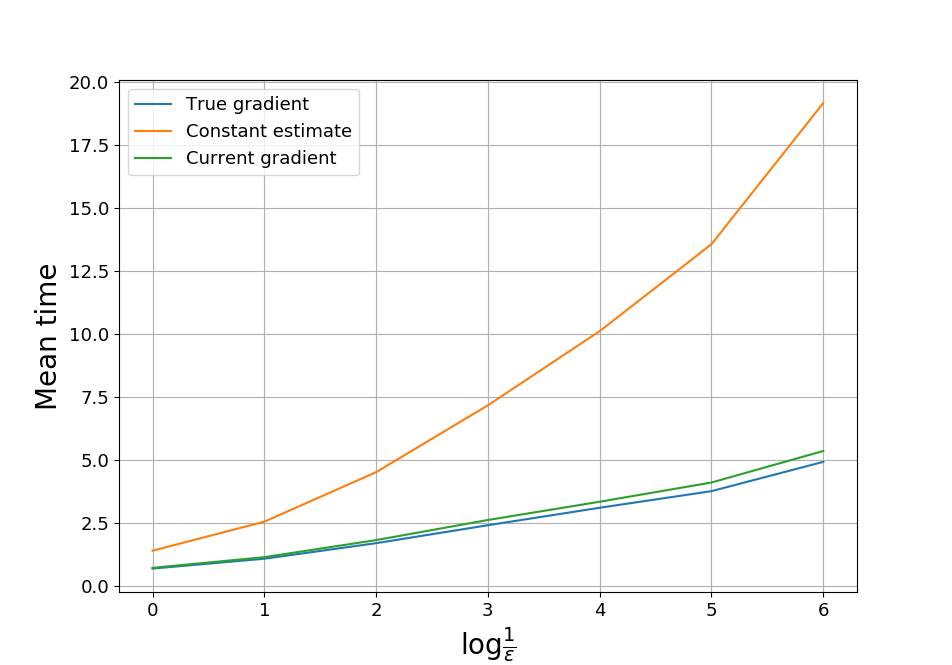

In [16]:
import matplotlib.pyplot as plt
%matplotlib notebook
cur = dict()
keys = list(d.keys())
keys.sort()
for i in keys:
    for j in d[i]:
        if cur.__contains__(j):
            cur[j].append(d[i][j])
        else:
            cur[j] = [d[i][j]]
k = cur.keys()
import numpy as np
keys = [-np.log(i)/np.log(10) for i in keys]
for j in k:
    plt.plot(keys, cur[j])
plt.grid()
n = 13
plt.xticks(fontsize = n)
plt.yticks(fontsize = n)
plt.legend(k, fontsize = n)
n = 20
plt.xlabel(r'$\log\frac{1}{\epsilon}$', fontsize = n)
plt.ylabel('Mean time', fontsize = n)
plt.savefig('1.pdf')

In [1]:
import sys
sys.path.append("./Experiments")
sys.path.append("./Tests_functions")
import matplotlib.pyplot as plt
import comparison
%matplotlib notebook
import time

N = 10
time_max = 100
s=time.time()
results, f = comparison.strategy_LogSumExp(N, time_max = time_max, eps = 1e-5)
results_copy1 = results, f
time.time()-s

R0 0.2189929347170073
L_f 756.6583710542733
CurGrad
ConstEst
<bound method halving_square.CurGrad of <method_functions.halving_square object at 0xaaa0f2ac>>
<bound method halving_square.ConstEst of <method_functions.halving_square object at 0xa8c4602c>>
<bound method halving_square.ConstEst of <method_functions.halving_square object at 0xa8c460ac>>
<bound method halving_square.ConstEst of <method_functions.halving_square object at 0xa8c4612c>>
<bound method halving_square.ConstEst of <method_functions.halving_square object at 0xa8c461ac>>
<bound method halving_square.ConstEst of <method_functions.halving_square object at 0xa8c4624c>>
<bound method halving_square.ConstEst of <method_functions.halving_square object at 0xa8c4634c>>
<bound method halving_square.ConstEst of <method_functions.halving_square object at 0xa8c4642c>>
<bound method halving_square.ConstEst of <method_functions.halving_square object at 0xa8c4650c>>
<bound method halving_square.ConstEst of <method_functions.halving_

19.26046633720398

In [2]:
results.keys()
results = {i: results[i][3][-1]-results[i][3][0] for i in results}
results

{'HalvingSquare-CurGrad': 2.119920253753662,
 1.0: 6.879649639129639,
 0.1: 9.324229001998901,
 0.010000000000000002: 11.711790800094604,
 0.0010000000000000002: 13.192879438400269,
 0.00010000000000000002: 14.657142877578735,
 1.0000000000000003e-05: 15.977511405944824,
 1.0000000000000004e-06: 17.171669483184814,
 1.0000000000000004e-07: 18.18428063392639,
 1.0000000000000005e-08: 18.73340129852295,
 1.0000000000000005e-09: 19.121264934539795}

## 3. Comparison for LogSumExp

### N=10, $\epsilon$ = 0.1

In [1]:
N = 10
time_max = 3

In [2]:
import sys
sys.path.append("./Experiments")
sys.path.append("./Tests_functions")
import matplotlib.pyplot as plt
import comparison
%matplotlib notebook

time_max = 3
import time
s = time.time()
eps = 0.1
results, f = comparison.NEWcomparison_LogSumExp(N, time_max = time_max, eps = eps)
results_copy1 = results, f
time.time()-s

R0 2.189929347170073
L_f 63.36326026324125
Ellipsoids
CurGrad
ConstEst
PGM
FGM
<bound method halving_square.ConstEst of <method_functions.halving_square object at 0xa8c6ccec>> 0.0006128427602094114
<bound method halving_square.CurGrad of <method_functions.halving_square object at 0xa8c6cc6c>> None


3.2407267093658447

In [3]:
import matplotlib.pyplot as plt
%matplotlib notebook
keys = list(results.keys())
keys.sort()
new_dict = dict()
for key in keys:
    print(key, len(results[key][3]))
    times = [i - results[key][3][0] for i in results[key][3]][:100]
    f_value = [f.calculate_function(i[0], i[1]) for i in results[key][2]][:100]
    new_dict[key] = (times, f_value)

Ellipsoids 6
FGM 5
HalvingSquare-ConstEst 63
HalvingSquare-CurGrad 63
PGM 5


<IPython.core.display.Javascript object>


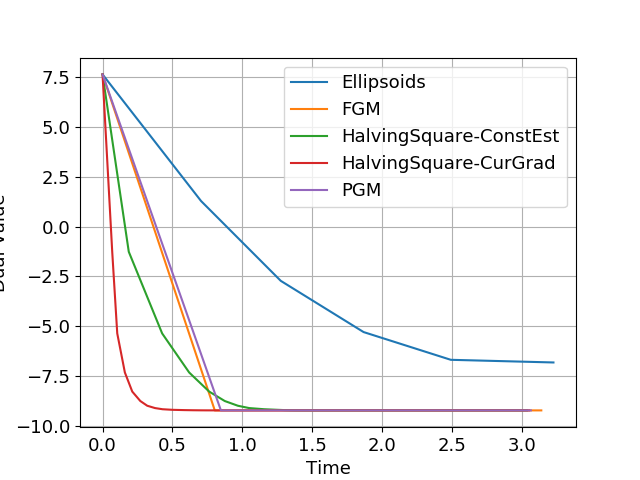

In [4]:
import matplotlib.pylab as plt
%matplotlib notebook
keys.sort()
for i in keys:
    plt.plot(new_dict[i][0], new_dict[i][1])
plt.grid()
n = 13
plt.xticks(fontsize = n)
plt.yticks(fontsize = n)
plt.legend(keys, fontsize = n)
plt.ylabel('Dual Value', fontsize = n)
plt.xlabel('Time', fontsize = n)
plt.savefig("{:d}_{:.0e}.pdf".format(N,eps))

### N=10, $\epsilon$ = 0.001

In [7]:
import sys
sys.path.append("./Experiments")
sys.path.append("./Tests_functions")
import matplotlib.pyplot as plt
import comparison
%matplotlib notebook

import time
s = time.time()
eps = 0.001
results, f = comparison.NEWcomparison_LogSumExp(N, time_max = time_max, eps = eps)
results_copy1 = results, f
time.time()-s

R0 2.189929347170073
L_f 63.23457173378573
Ellipsoids
CurGrad
ConstEst
PGM
FGM
<bound method halving_square.CurGrad of <method_functions.halving_square object at 0xa66db26c>> None
<bound method halving_square.ConstEst of <method_functions.halving_square object at 0xa66db3ac>> 4.435623718775162e-06


3.9419565200805664

In [20]:
import matplotlib.pyplot as plt
%matplotlib notebook
keys = list(results.keys())
keys.sort()

#keys = ["HalvingSquare-Const", 'Ellipsoids']
new_dict = dict()
for key in keys:
    print(key, len(results[key][3]))
    times = [i - results[key][3][0] for i in results[key][3]][:100]
    f_value = [f.calculate_function(i[0], i[1]) for i in results[key][2]][:100]
    new_dict[key] = (times, f_value)

Ellipsoids 4
FGM 4
HalvingSquare-ConstEst 14
HalvingSquare-CurGrad 61
PGM 4


<IPython.core.display.Javascript object>


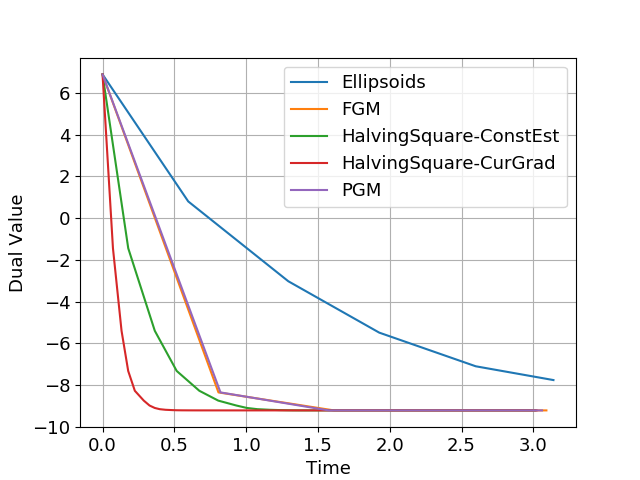

In [6]:
import matplotlib.pyplot as plt
%matplotlib notebook
keys.sort()
for i in keys:
    plt.plot(new_dict[i][0], new_dict[i][1])
plt.grid()
n = 13
plt.xticks(fontsize = n)
plt.yticks(fontsize = n)
plt.legend(keys, fontsize = n)
plt.ylabel('Dual Value', fontsize = n)
plt.xlabel('Time', fontsize = n)
plt.show()
plt.savefig("{:d}_{:.0e}.pdf".format(N,eps))

### N=10, $\epsilon$ = 1e-10

In [23]:
import sys
sys.path.append("./Experiments")
sys.path.append("./Tests_functions")
import matplotlib.pyplot as plt
import comparison
%matplotlib notebook

import time
s = time.time()
eps = 1e-10
results, f = comparison.NEWcomparison_LogSumExp(N, time_max = time_max, eps = eps)
results_copy1 = results, f
time.time()-s

R0 2.189929347170073
L_f 63.44061177291235
Ellipsoids
CurGrad
ConstEst
PGM
FGM
<bound method halving_square.CurGrad of <method_functions.halving_square object at 0xa691b4cc>> None
<bound method halving_square.ConstEst of <method_functions.halving_square object at 0xa691b54c>> 4.418176004970006e-13


3.3662467002868652

In [24]:
import matplotlib.pyplot as plt
%matplotlib notebook
keys = list(results.keys())
keys.sort()

#keys = ["HalvingSquare-Const", 'Ellipsoids']
new_dict = dict()
for key in keys:
    print(key, len(results[key][3]))
    times = [i - results[key][3][0] for i in results[key][3]][:100]
    f_value = [f.calculate_function(i[0], i[1]) for i in results[key][2]][:100]
    new_dict[key] = (times, f_value)

Ellipsoids 2
FGM 2
HalvingSquare-ConstEst 6
HalvingSquare-CurGrad 62
PGM 2


<IPython.core.display.Javascript object>


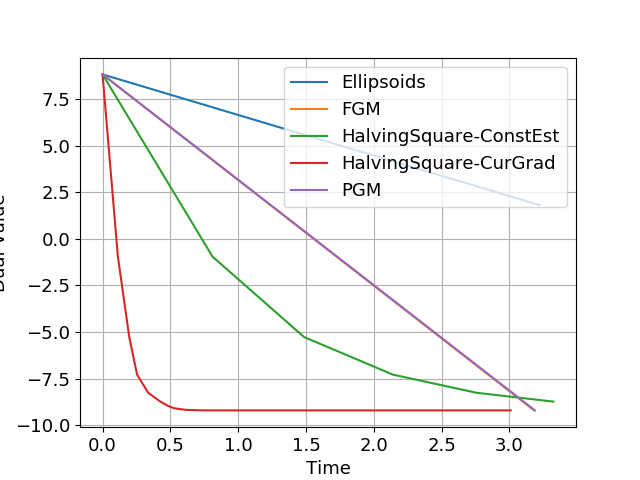

In [26]:
import matplotlib.pyplot as plt
%matplotlib notebook
keys.sort()
for i in keys:
    plt.plot(new_dict[i][0], new_dict[i][1])

plt.grid()
n = 13
plt.xticks(fontsize = n)
plt.yticks(fontsize = n)
plt.legend(keys, fontsize = n)
plt.ylabel('Dual Value', fontsize = n)
plt.xlabel('Time', fontsize = n)
plt.show()
plt.savefig("{:d}_{:.0e}.pdf".format(N,eps))

### N=100, $\epsilon$ = 0.1

In [7]:
N = 100
time_max = 20

In [8]:
import sys
sys.path.append("./Experiments")
sys.path.append("./Tests_functions")
import matplotlib.pyplot as plt
import comparison
%matplotlib notebook

import time
s = time.time()
eps = 0.1
results, f = comparison.NEWcomparison_LogSumExp(N, time_max = time_max, eps = eps)
results_copy1 = results, f
time.time()-s

R0 3.0381311745351813
L_f 69.10776758854972
Ellipsoids
CurGrad
ConstEst
PGM
FGM
<bound method halving_square.ConstEst of <method_functions.halving_square object at 0xa74db2ac>> 4.094104620998136e-05
<bound method halving_square.CurGrad of <method_functions.halving_square object at 0xa74e4d2c>> None


21.00106382369995

In [9]:
import matplotlib.pyplot as plt
%matplotlib notebook
keys = list(results.keys())
keys.sort()

#keys = ["HalvingSquare-Const", 'Ellipsoids']
new_dict = dict()
for key in keys:
    print(key, len(results[key][3]))
    times = [i - results[key][3][0] for i in results[key][3]][:100]
    f_value = [f.calculate_function(i[0], i[1]) for i in results[key][2]][:100]
    new_dict[key] = (times, f_value)

Ellipsoids 8
FGM 7
HalvingSquare-ConstEst 90
HalvingSquare-CurGrad 88
PGM 7


<IPython.core.display.Javascript object>


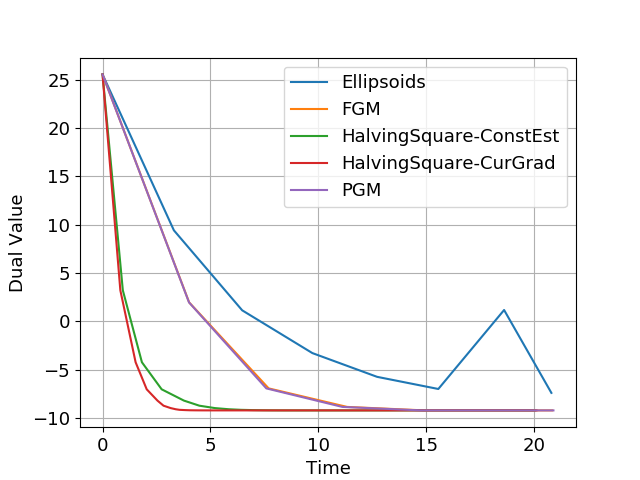

In [10]:
import matplotlib.pyplot as plt
%matplotlib notebook
keys.sort()
for i in keys:
    plt.plot(new_dict[i][0], new_dict[i][1])
plt.grid()
n = 13
plt.xticks(fontsize = n)
plt.yticks(fontsize = n)
plt.legend(keys, fontsize = n)
plt.ylabel('Dual Value', fontsize = n)
plt.xlabel('Time', fontsize = n)
plt.show()
plt.savefig("{:d}_{:.0e}.pdf".format(N,eps))

### N=100, $\epsilon$ = 0.001

In [4]:
import sys
sys.path.append("./Experiments")
sys.path.append("./Tests_functions")
import matplotlib.pyplot as plt
import comparison
%matplotlib notebook

import time
s = time.time()
eps = 0.001
results, f = comparison.NEWcomparison_LogSumExp(N, time_max = time_max, eps = eps)
results_copy1 = results, f
time.time()-s

R0 3.0381311745351813
L_f 69.3225959678117
Ellipsoids
CurGrad
ConstEst
PGM
FGM
<bound method halving_square.ConstEst of <method_functions.halving_square object at 0xa6901bcc>> 4.5439785585752784e-07
<bound method halving_square.CurGrad of <method_functions.halving_square object at 0xa6901b2c>> None


20.829628944396973

In [5]:
import matplotlib.pyplot as plt
%matplotlib notebook
keys = list(results.keys())
keys.sort()

#keys = ["HalvingSquare-Const", 'Ellipsoids']
new_dict = dict()
for key in keys:
    print(key, len(results[key][3]))
    times = [i - results[key][3][0] for i in results[key][3]][:100]
    f_value = [f.calculate_function(i[0], i[1]) for i in results[key][2]][:100]
    new_dict[key] = (times, f_value)

Ellipsoids 5
FGM 5
HalvingSquare-ConstEst 54
HalvingSquare-CurGrad 94
PGM 5


<IPython.core.display.Javascript object>


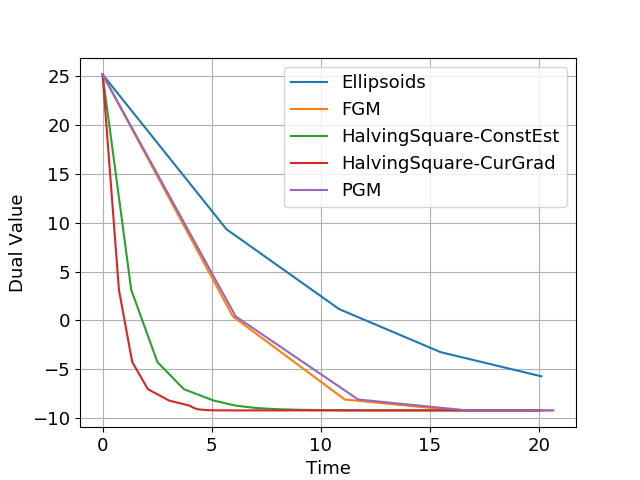

In [6]:
import matplotlib.pyplot as plt
%matplotlib notebook
keys.sort()
for i in keys:
    plt.plot(new_dict[i][0], new_dict[i][1])
plt.grid()
n = 13
plt.xticks(fontsize = n)
plt.yticks(fontsize = n)
plt.legend(keys, fontsize = n)
plt.ylabel('Dual Value', fontsize = n)
plt.xlabel('Time', fontsize = n)
plt.show()
plt.savefig("{:d}_{:.0e}.pdf".format(N,eps))

### N=100, $\epsilon$ = 1e-10

In [1]:
import sys
sys.path.append("./Experiments")
sys.path.append("./Tests_functions")
import matplotlib.pyplot as plt
import comparison
%matplotlib notebook

import time
s = time.time()
eps = 1e-10
results, f = comparison.NEWcomparison_LogSumExp(N, time_max = time_max, eps = eps)
results_copy1 = results, f
time.time()-s

R0 3.0381311745351813
L_f 69.26149825766446
Ellipsoids
CurGrad
ConstEst
PGM
FGM
<bound method halving_square.CurGrad of <method_functions.halving_square object at 0xa8cb9b2c>> None
<bound method halving_square.ConstEst of <method_functions.halving_square object at 0xa8cb9bac>> 4.997631989570495e-14


25.155258655548096

In [2]:
import matplotlib.pyplot as plt
%matplotlib notebook
keys = list(results.keys())
keys.sort()

#keys = ["HalvingSquare-Const", 'Ellipsoids']
new_dict = dict()
for key in keys:
    print(key, len(results[key][3]))
    times = [i - results[key][3][0] for i in results[key][3]][:100]
    f_value = [f.calculate_function(i[0], i[1]) for i in results[key][2]][:100]
    new_dict[key] = (times, f_value)

Ellipsoids 3
FGM 3
HalvingSquare-ConstEst 10
HalvingSquare-CurGrad 98
PGM 3


<IPython.core.display.Javascript object>


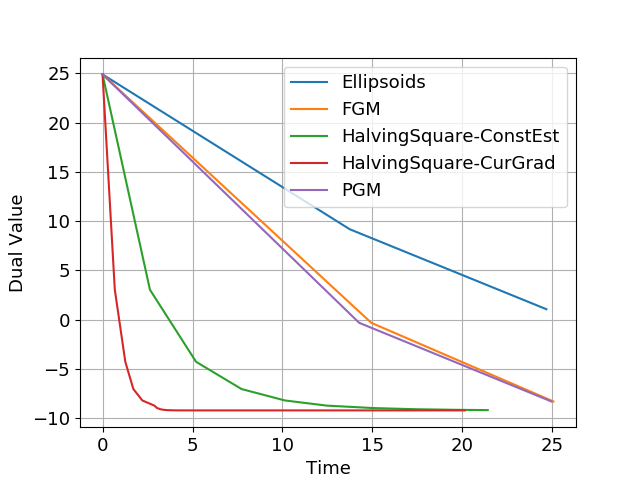

In [3]:
import matplotlib.pyplot as plt
%matplotlib notebook
keys.sort()
for i in keys:
    plt.plot(new_dict[i][0], new_dict[i][1])

plt.grid()
n = 13
plt.xticks(fontsize = n)
plt.yticks(fontsize = n)
plt.legend(keys, fontsize = n)
plt.ylabel('Dual Value', fontsize = n)
plt.xlabel('Time', fontsize = n)
plt.show()
plt.savefig("{:d}_{:.0e}.pdf".format(N,eps))